In [48]:
import pandas as pd
import matplotlib.pyplot as plt


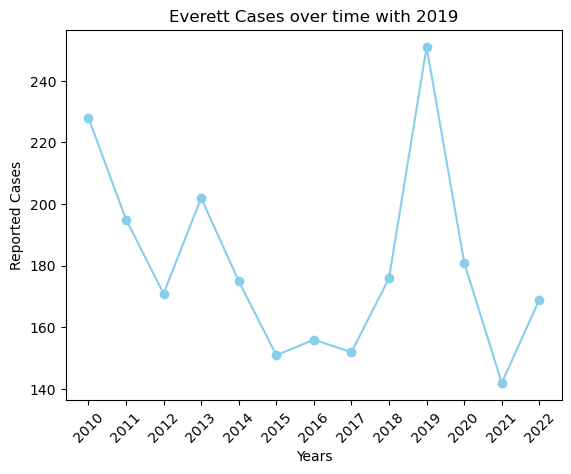

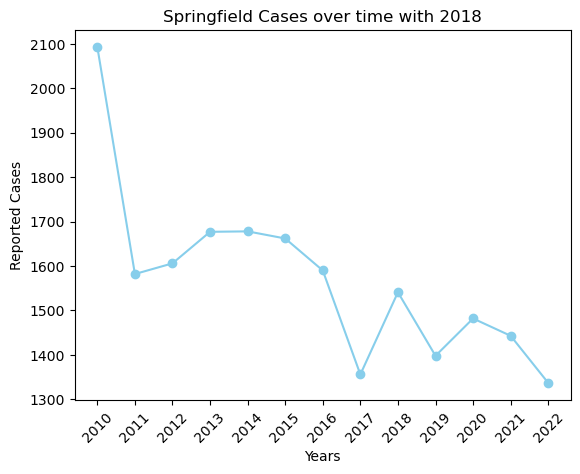

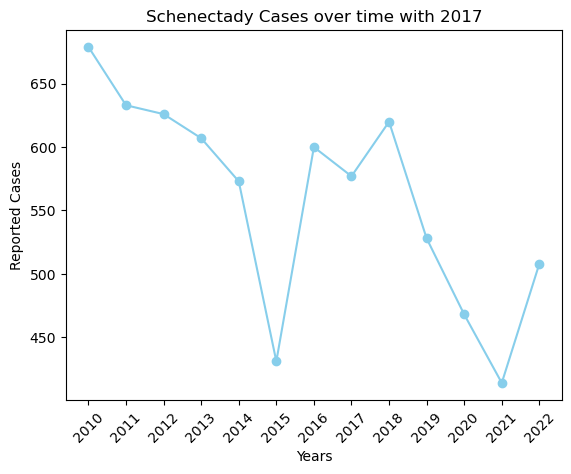

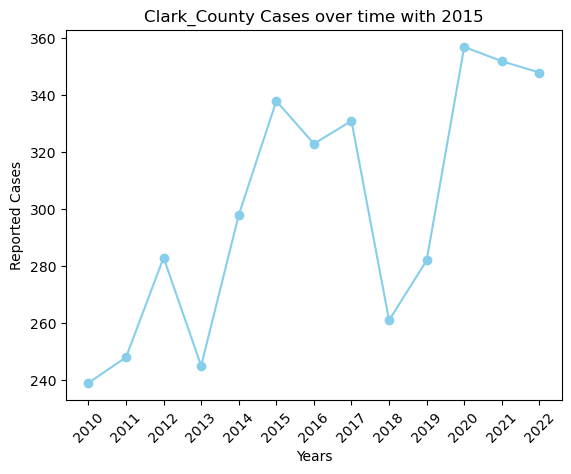

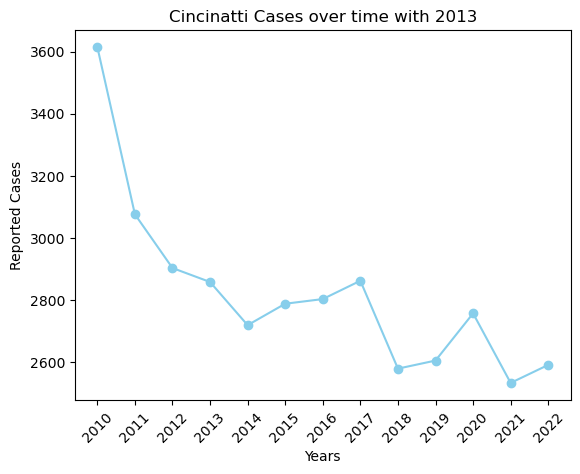

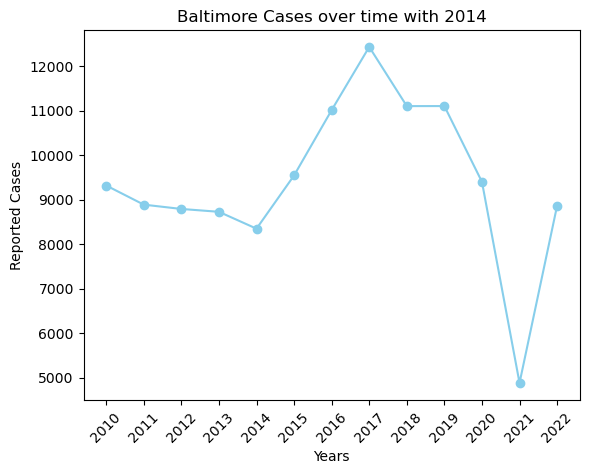

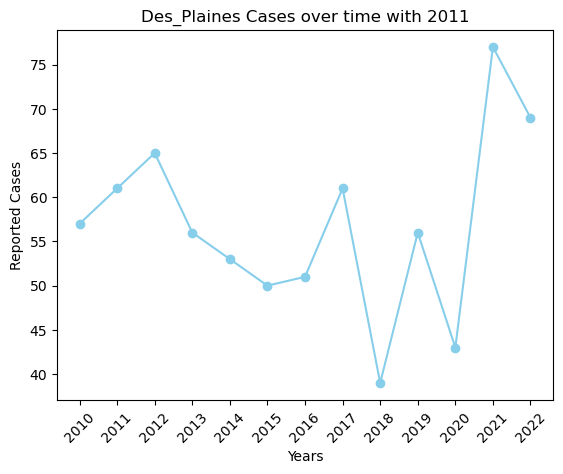

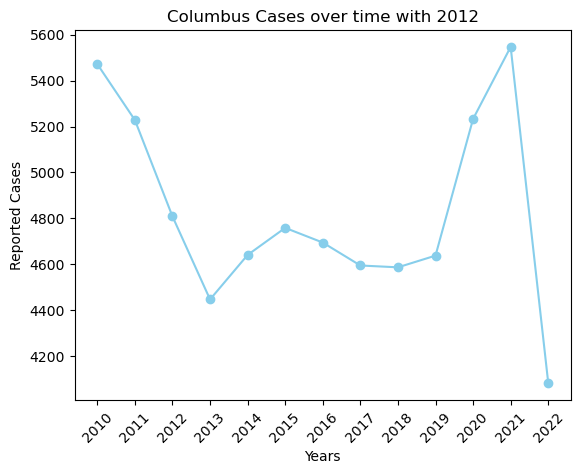

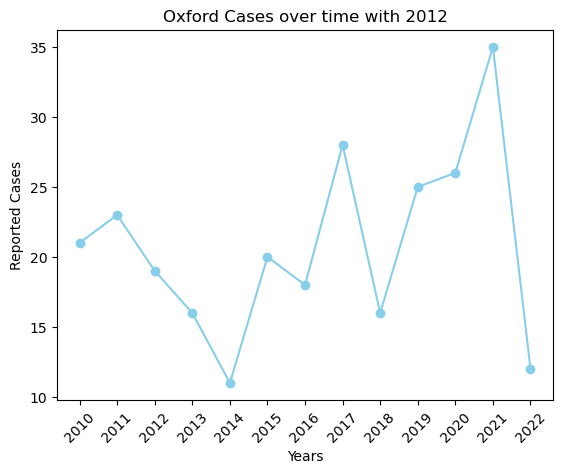

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/Users/trevormcdonough/Desktop/ET_Project/data-storage/merged_data.csv")

casino_openings = {
    'Everett': 2019, 'Springfield': 2018, 'Schenectady': 2017,
    'Clark_County': 2015, 'Cincinatti': 2013, 'Baltimore': 2014,
    'Des_Plaines': 2011, 'Columbus': 2012, 'Oxford': 2012
}

for city, opening_year in casino_openings.items():

    city_df = df[df['City'] == city]


    before_opening = city_df[city_df['series'] == 'Reported'].iloc[:, 2:opening_year - 2008]  # Columns for years before opening
    after_opening = city_df[city_df['series'] == 'Reported'].iloc[:, opening_year - 2008:]  # Columns for years after opening
    
    
    reported_df = city_df[city_df['series'] == 'Reported'].drop(columns=['City', 'series']).transpose()


    plt.plot(reported_df, marker='o', color='skyblue', linestyle='-')
    plt.xlabel("Years")
    plt.ylabel("Reported Cases")
    plt.title(f"{city} Cases over time with {opening_year}")
    plt.xticks(rotation=45)
    plt.show()


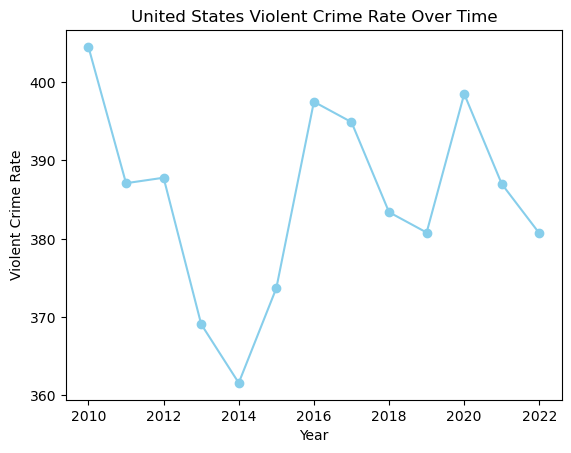

In [50]:
data = {
    'Year': [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
    'Violent Crime Rate': [404.5, 387.1, 387.8, 369.1, 361.6, 373.7, 397.5, 394.9, 383.4, 380.8, 398.5, 387, 380.7]
}

crime_rates_us_df = pd.DataFrame(data)

plt.plot(crime_rates_us_df['Year'], crime_rates_us_df['Violent Crime Rate'], marker='o', color='skyblue', linestyle='-')
plt.title('United States Violent Crime Rate Over Time')
plt.xlabel('Year')
plt.ylabel('Violent Crime Rate')
plt.show()

In [51]:
crime_rates_us_df

,Year,Violent Crime Rate
0,2010,404.5
1,2011,387.1
2,2012,387.8
3,2013,369.1
4,2014,361.6
5,2015,373.7
6,2016,397.5
7,2017,394.9
8,2018,383.4
9,2019,380.8


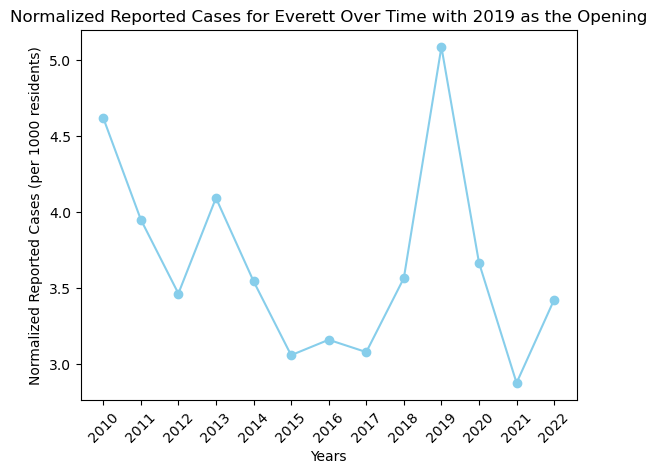

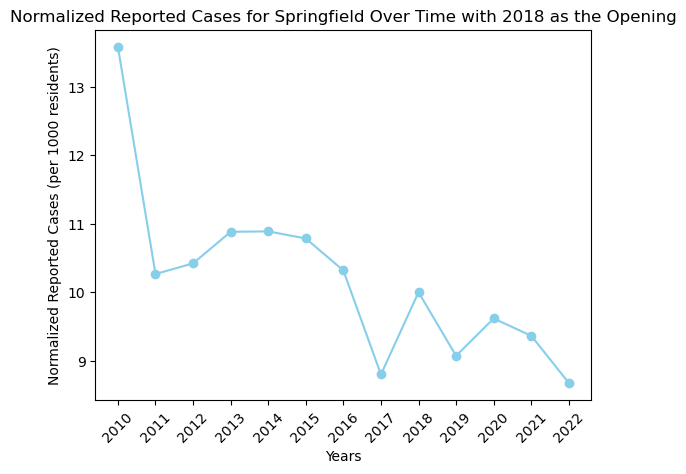

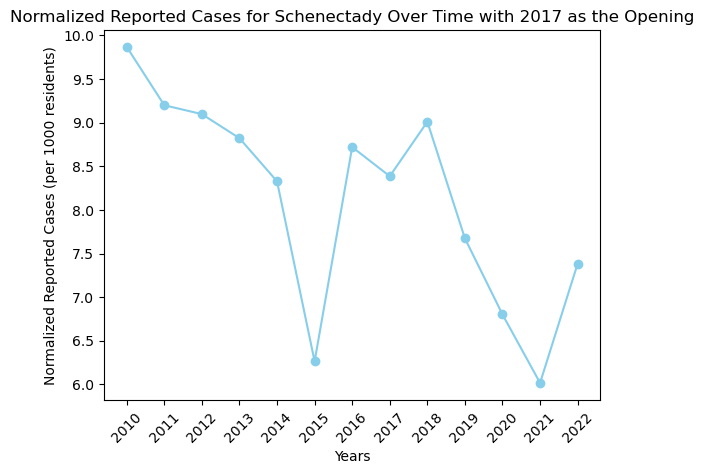

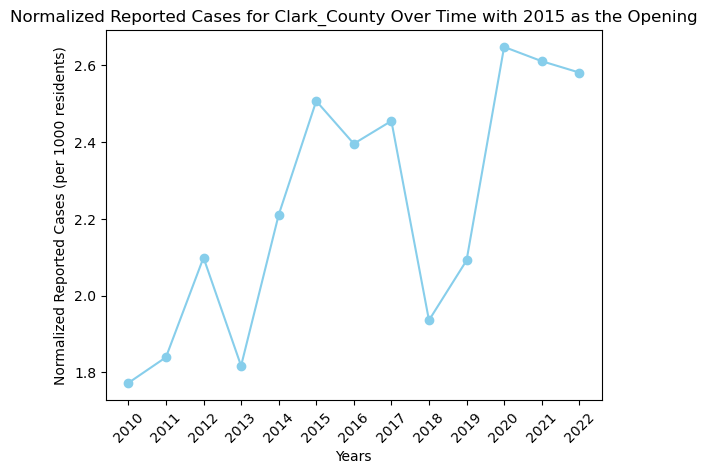

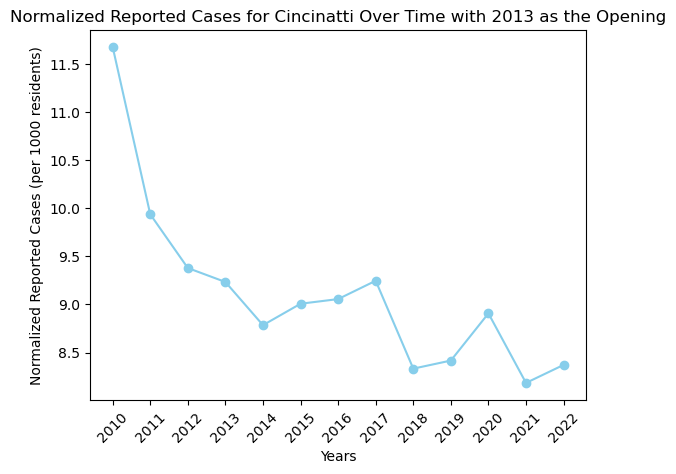

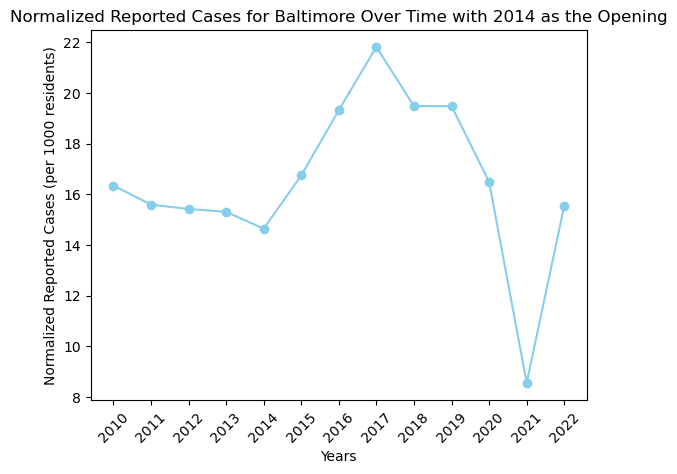

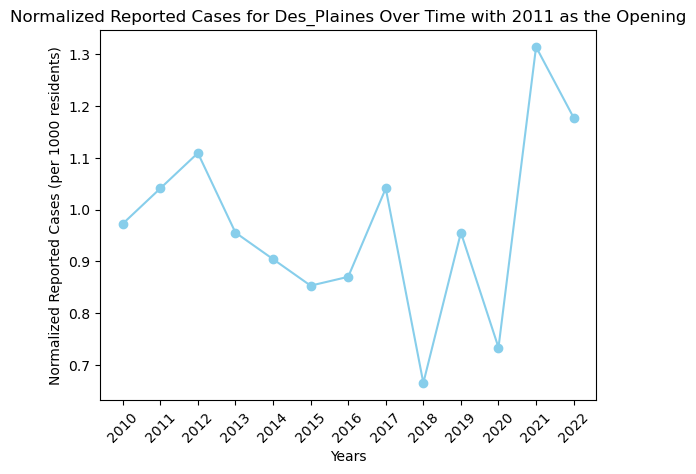

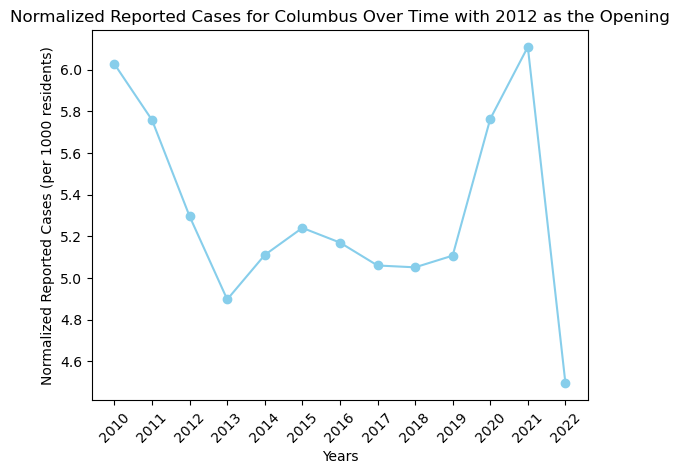

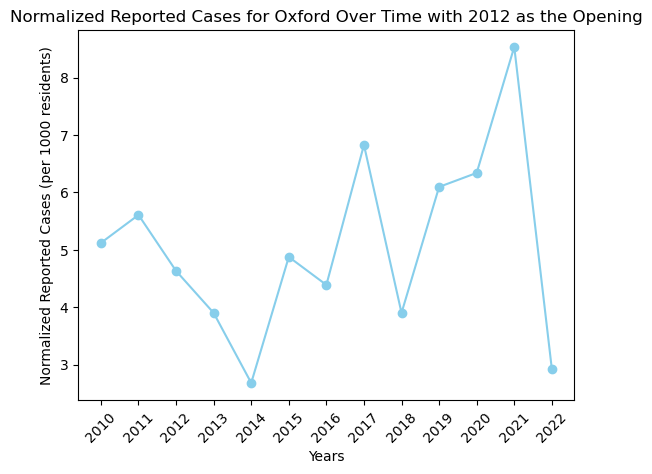

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/Users/trevormcdonough/Desktop/ET_Project/data-storage/merged_data.csv")


population_data = {
    'Everett': 49350,
    'Springfield': 154064,
    'Schenectady': 68809,
    'Clark_County': 134831,
    'Cincinatti': 309513,
    'Baltimore': 569931,
    'Des_Plaines': 58594,
    'Columbus': 907971,
    'Oxford': 4101
}


casino_openings = {
    'Everett': 2019, 'Springfield': 2018, 'Schenectady': 2017,
    'Clark_County': 2015, 'Cincinatti': 2013, 'Baltimore': 2014,
    'Des_Plaines': 2011, 'Columbus': 2012, 'Oxford': 2012
}


for city, opening_year in casino_openings.items():
    city_df = df[df['City'] == city]
  
    before_opening = city_df[city_df['series'] == 'Reported'].iloc[:, 2:opening_year - 2008]  # Columns for years before opening
    after_opening = city_df[city_df['series'] == 'Reported'].iloc[:, opening_year - 2008:]  # Columns for years after opening

    reported_df = city_df[city_df['series'] == 'Reported'].drop(columns=['City', 'series']).transpose()
    population = population_data[city]
    normalized_reported_df = (reported_df / population) * 1000  # Per 1000 residents
    plt.plot(normalized_reported_df, marker='o', color='skyblue', linestyle='-')
    plt.xlabel("Years")
    plt.ylabel("Normalized Reported Cases (per 1000 residents)")
    plt.title(f"Normalized Reported Cases for {city} Over Time with {opening_year} as the Opening")
    plt.xticks(rotation=45)
    plt.show()


In [53]:

df = pd.read_csv("/Users/trevormcdonough/Desktop/ET_Project/data-storage/merged_data.csv")

df = df[df['series'] == 'Reported']

df['Opening Year'] = df['City'].map(casino_openings)

df

,City,series,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,Opening Year
1,Baltimore,Reported,9316,8886,8789,8725,8346,9542,11010.0,12430.0,11100.0,11101.0,9398.0,4880.0,8861.0,2014
3,Cincinatti,Reported,3615,3076,2903,2858,2719,2788,2803.0,2862.0,2579.0,2605.0,2757.0,2533.0,2591.0,2013
5,Clark_County,Reported,239,248,283,245,298,338,323.0,331.0,261.0,282.0,357.0,352.0,348.0,2015
7,Columbus,Reported,5472,5228,4808,4446,4640,4758,4694.0,4594.0,4586.0,4637.0,5233.0,5547.0,4082.0,2012
9,Des_Plaines,Reported,57,61,65,56,53,50,51.0,61.0,39.0,56.0,43.0,77.0,69.0,2011
11,Everett,Reported,228,195,171,202,175,151,156.0,152.0,176.0,251.0,181.0,142.0,169.0,2019
13,Oxford,Reported,21,23,19,16,11,20,18.0,28.0,16.0,25.0,26.0,35.0,12.0,2012
15,Schenectady,Reported,679,633,626,607,573,431,600.0,577.0,620.0,528.0,468.0,414.0,508.0,2017
17,Springfield,Reported,2093,1582,1606,1677,1678,1662,1590.0,1356.0,1541.0,1398.0,1482.0,1443.0,1337.0,2018


In [56]:
dfs = []

for city, opening_year in casino_openings.items():
    city_reported_data = reported_data[reported_data['City'] == city]
    
    crime_rate_opening_year = city_reported_data[str(opening_year)].values[0]
    crime_rate_3_years_after = city_reported_data[str(opening_year + 3)].values[0]
    
    difference = crime_rate_3_years_after - crime_rate_opening_year
    
    df = pd.DataFrame({
        'City': [city],
        'Opening Year': [opening_year],
        'Crime Rate Opening Year': [crime_rate_opening_year],
        'Crime Rate 3 Years After': [crime_rate_3_years_after],
        'Crime Rate Difference': [difference]
    })
    
    dfs.append(df)

crime_rates_df = pd.concat(dfs, ignore_index=True)

crime_rates_df['Opening Year'] = crime_rates_df['City'].map(casino_openings)

crime_rates_df

,City,Opening Year,Crime Rate Opening Year,Crime Rate 3 Years After,Crime Rate Difference
0,Everett,2019,251.0,169.0,-82.0
1,Springfield,2018,1541.0,1443.0,-98.0
2,Schenectady,2017,577.0,468.0,-109.0
3,Clark_County,2015,338.0,261.0,-77.0
4,Cincinatti,2013,2858.0,2803.0,-55.0
5,Baltimore,2014,8346.0,12430.0,4084.0
6,Des_Plaines,2011,61.0,53.0,-8.0
7,Columbus,2012,4808.0,4758.0,-50.0
8,Oxford,2012,19.0,20.0,1.0
